# Data prep

In [1]:
import os
def is_colab():
    try:
        from google.colab import drive
        return True
    except:
        return False

if is_colab():
    %cd /content/
    !rm -rf pytorch_random

    !git clone https://github.com/Priyanshu-hawk/pytorch_random.git
    if os.getcwd() != '/content/pytorch_random':
        %cd /content/pytorch_random
        !pip install -r req.txt

/content
Cloning into 'pytorch_random'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 272 (delta 8), reused 11 (delta 2), pack-reused 253 (from 1)
Receiving objects: 100% (272/272), 16.52 MiB | 9.16 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/pytorch_random
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully

In [2]:
from torchvision import datasets
flowers102 = datasets.Flowers102("./dataset", download=True)

100%|██████████| 345M/345M [00:17<00:00, 19.8MB/s]


Extracting dataset/flowers-102/102flowers.tgz to dataset/flowers-102


100%|██████████| 502/502 [00:00<00:00, 379kB/s]


100%|██████████| 15.0k/15.0k [00:00<00:00, 14.4MB/s]


In [5]:
# img_lables
import scipy.io as sio
img_lable = sio.loadmat("./dataset/flowers-102/imagelabels.mat")
img_lable["labels"][0].shape

(8189,)

In [6]:
import pandas as pd
class_names = pd.read_csv("./oxford_flower_102_name.csv")
class_name_list = []
for cn in class_names["Name"]:
    class_name_list.append(cn)

print(class_name_list)

['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia', 'cau

In [7]:
# img_lables
import scipy.io as sio
img_sid = sio.loadmat("./dataset/flowers-102/setid.mat")
img_sid

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 17:38:58 2009',
 '__version__': '1.0',
 '__globals__': [],
 'trnid': array([[6765, 6755, 6768, ..., 8026, 8036, 8041]], dtype=uint16),
 'valid': array([[6773, 6767, 6739, ..., 8028, 8008, 8030]], dtype=uint16),
 'tstid': array([[6734, 6735, 6737, ..., 8044, 8045, 8047]], dtype=uint16)}

In [8]:
lable_dict = {}
for j in img_lable["labels"][0]:
    if j in lable_dict:
        lable_dict[j]+=1
    else:
        lable_dict[j]=1

In [9]:
lable_dict

{77: 251,
 73: 194,
 88: 154,
 89: 184,
 81: 166,
 46: 196,
 74: 171,
 51: 258,
 44: 93,
 82: 112,
 83: 131,
 78: 137,
 80: 105,
 75: 120,
 41: 127,
 43: 130,
 76: 107,
 84: 86,
 58: 114,
 56: 109,
 86: 58,
 60: 109,
 92: 66,
 11: 87,
 65: 102,
 8: 85,
 23: 91,
 30: 85,
 72: 96,
 53: 93,
 37: 108,
 17: 85,
 12: 87,
 29: 78,
 52: 85,
 18: 82,
 36: 75,
 90: 82,
 71: 78,
 40: 67,
 48: 71,
 55: 71,
 85: 63,
 91: 76,
 20: 56,
 47: 67,
 59: 67,
 2: 60,
 5: 65,
 28: 66,
 70: 62,
 22: 59,
 54: 61,
 87: 63,
 66: 61,
 32: 45,
 4: 56,
 42: 59,
 13: 49,
 38: 56,
 63: 54,
 68: 54,
 69: 54,
 93: 46,
 14: 48,
 64: 52,
 19: 49,
 49: 49,
 61: 50,
 50: 92,
 15: 49,
 9: 46,
 33: 46,
 26: 41,
 25: 41,
 3: 40,
 16: 41,
 79: 41,
 1: 40,
 21: 40,
 24: 42,
 27: 40,
 31: 52,
 34: 40,
 35: 43,
 39: 41,
 67: 42,
 10: 45,
 45: 40,
 6: 45,
 7: 40,
 57: 67,
 62: 55,
 94: 162,
 95: 128,
 96: 91,
 97: 66,
 98: 82,
 99: 63,
 100: 49,
 101: 58,
 102: 48}

In [10]:
import numpy as np
keys = list(lable_dict.keys())
values = list(lable_dict.values())
print(values)
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
print(sorted_dict)


[251, 194, 154, 184, 166, 196, 171, 258, 93, 112, 131, 137, 105, 120, 127, 130, 107, 86, 114, 109, 58, 109, 66, 87, 102, 85, 91, 85, 96, 93, 108, 85, 87, 78, 85, 82, 75, 82, 78, 67, 71, 71, 63, 76, 56, 67, 67, 60, 65, 66, 62, 59, 61, 63, 61, 45, 56, 59, 49, 56, 54, 54, 54, 46, 48, 52, 49, 49, 50, 92, 49, 46, 46, 41, 41, 40, 41, 41, 40, 40, 42, 40, 52, 40, 43, 41, 42, 45, 40, 45, 40, 67, 55, 162, 128, 91, 66, 82, 63, 49, 58, 48]
{34: 40, 1: 40, 7: 40, 45: 40, 3: 40, 21: 40, 27: 40, 39: 41, 26: 41, 25: 41, 79: 41, 16: 41, 67: 42, 24: 42, 35: 43, 6: 45, 10: 45, 32: 45, 9: 46, 33: 46, 93: 46, 14: 48, 102: 48, 49: 49, 19: 49, 15: 49, 100: 49, 13: 49, 61: 50, 31: 52, 64: 52, 68: 54, 63: 54, 69: 54, 62: 55, 38: 56, 4: 56, 20: 56, 101: 58, 86: 58, 22: 59, 42: 59, 2: 60, 66: 61, 54: 61, 70: 62, 85: 63, 87: 63, 99: 63, 5: 65, 97: 66, 28: 66, 92: 66, 47: 67, 59: 67, 40: 67, 57: 67, 48: 71, 55: 71, 36: 75, 91: 76, 71: 78, 29: 78, 90: 82, 98: 82, 18: 82, 52: 85, 8: 85, 30: 85, 17: 85, 84: 86, 12: 8

In [11]:
len(img_lable["labels"][0])

8189

In [12]:
# data agrigation
# crearing train and test
import os, shutil
BASE_IMG_FOLDER = "./dataset/flowers-102/jpg"
BASE_DEST_FOLDER = "./dataset/flowers-102/data"
os.makedirs(BASE_DEST_FOLDER, exist_ok=True)

flower_imgs = sorted(os.listdir(BASE_IMG_FOLDER))

for i in range(len(img_lable["labels"][0])):
    flower_src = os.path.join(BASE_IMG_FOLDER, str(flower_imgs[i]))
    flower_dest = os.path.join(BASE_DEST_FOLDER, str(img_lable["labels"][0][i]))
    # print(flower_dest)
    os.makedirs(flower_dest, exist_ok=True)
    shutil.move(flower_src, flower_dest)

In [13]:
# creating train and test
import random
BASE_DATA_FOLDER = "./dataset/flowers-102/data"
BASE_TRAIN_DATA_FOLDER = "./dataset/flowers-102/train_data"
TRAIN_FOLDER = os.path.join(BASE_TRAIN_DATA_FOLDER, "train")
TEST_FOLDER = os.path.join(BASE_TRAIN_DATA_FOLDER, "test")

os.makedirs(BASE_TRAIN_DATA_FOLDER, exist_ok=True)
os.makedirs(TRAIN_FOLDER, exist_ok=True)
os.makedirs(TEST_FOLDER, exist_ok=True)

#1. Directly moving all data to train_data/train
for mda in os.listdir(BASE_DATA_FOLDER):
    shutil.move(os.path.join(BASE_DATA_FOLDER, mda), TRAIN_FOLDER)

#2. Moving test_size % data to test folder
test_size = 0.15
for pf in os.listdir(TRAIN_FOLDER):
    total_train_imgs = os.listdir(os.path.join(TRAIN_FOLDER, pf))
    test_dest = os.path.join(TEST_FOLDER, pf)
    os.makedirs(test_dest)
    mov_list = []
    for f in range(0, int(len(total_train_imgs) * test_size)):
        rand_int=random.randint(0, len(total_train_imgs)-1)
        while rand_int in mov_list:
            rand_int=random.randint(0, len(total_train_imgs)-1)
        mov_list.append(rand_int)

        shutil.move(os.path.join(TRAIN_FOLDER, pf, total_train_imgs[rand_int]), test_dest)

# model train

In [14]:
import torch
from torch import nn
from torchvision import models
import os
from torchinfo import summary

#custom_modules
from Vision_Transformer.data_setup import createDataloader

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
eff_net_b0_weight = models.EfficientNet_B0_Weights.IMAGENET1K_V1
eff_net_transfromer = eff_net_b0_weight.transforms()
eff_net_transfromer

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [17]:
#datast
BASE_TRAIN_DATA_FOLDER = "./dataset/flowers-102/train_data"
datapath = BASE_TRAIN_DATA_FOLDER
train_dl, test_dl, _classes = createDataloader(train_path=os.path.join(datapath, "train"),
                                     test_path=os.path.join(datapath, "test"),
                                     train_transform=eff_net_transfromer,
                                     test_transform=eff_net_transfromer,
                                     BTACH_SIZE=32)

In [18]:
len(train_dl), len(test_dl), len(_classes), _classes

(219,
 38,
 102,
 ['1',
  '10',
  '100',
  '101',
  '102',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '2',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '3',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '4',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '5',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '6',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '7',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '8',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '9',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99'])

In [19]:
eff_net_model = models.efficientnet_b0(weights=eff_net_b0_weight)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 150MB/s]


In [20]:
# pause train for non classif layer
for p in eff_net_model.parameters():
    p.requires_grad = False

In [21]:
#swaping outlayer
eff_net_model.classifier = nn.Sequential(
    nn.Dropout(0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=len(_classes), bias=True)
)

In [22]:
summary(model=eff_net_model, input_size=(1,3,224,224),  col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 102]             --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

In [23]:
eff_net_model = eff_net_model.to(device=device)

In [24]:
def acc_fn(y_preds, y):
    return(torch.eq(y_preds, y).sum() / len(y))

In [25]:
# traning on own data
loss = nn.CrossEntropyLoss().to(device=device)
optim = torch.optim.Adam(params=eff_net_model.parameters())
from Vision_Transformer.utils import trainit

trainit(eff_net_model, train_dl, test_dl, loss, optim, 10, True, device=device)

# for e in range(0, 10):
# 	eff_net_model.train()
# 	total_loss = 0
# 	total_acc = 0
# 	for img, lable in train_dl:
# 		img = img.to(device)
# 		lable = lable.to(device)
# 		y_preds = eff_net_model(img)
# 		tr_loss = loss(y_preds, lable)
# 		total_loss+=tr_loss.item()
# 		total_acc+=acc_fn(torch.argmax(y_preds, dim=1), lable).item()
# 		optim.zero_grad()
# 		tr_loss.backward()
# 		optim.step()
# 	print(total_loss/len(train_dl), total_acc/len(train_dl))


  0%|          | 0/10 [00:00<?, ?it/s]

Train: Loss - 2.277262356727635 | Accuracy - 0.6114644408226013


 10%|█         | 1/10 [01:21<12:14, 81.61s/it]

Test: Loss - 0.9924499988555908 | Accuracy - 0.8651315569877625
Train: Loss - 0.7484013100737306 | Accuracy - 0.9008072018623352


 20%|██        | 2/10 [02:42<10:49, 81.23s/it]

Test: Loss - 0.6039085388183594 | Accuracy - 0.8947368264198303
Train: Loss - 0.46894060408688026 | Accuracy - 0.9331172108650208


 30%|███       | 3/10 [04:01<09:21, 80.20s/it]

Test: Loss - 0.4583878219127655 | Accuracy - 0.9152960777282715
Train: Loss - 0.3315965595855016 | Accuracy - 0.9536243677139282


 40%|████      | 4/10 [05:29<08:19, 83.28s/it]

Test: Loss - 0.41057199239730835 | Accuracy - 0.9235197305679321
Train: Loss - 0.2594692171912759 | Accuracy - 0.9637556672096252


 50%|█████     | 5/10 [06:50<06:53, 82.61s/it]

Test: Loss - 0.3688441216945648 | Accuracy - 0.9202302694320679
Train: Loss - 0.22184513522881896 | Accuracy - 0.9628790616989136


 60%|██████    | 6/10 [08:11<05:26, 81.75s/it]

Test: Loss - 0.32978323101997375 | Accuracy - 0.9333881735801697
Train: Loss - 0.1768184763689836 | Accuracy - 0.9748858213424683


 70%|███████   | 7/10 [09:30<04:03, 81.15s/it]

Test: Loss - 0.3310413658618927 | Accuracy - 0.9251644611358643
Train: Loss - 0.15959596824428263 | Accuracy - 0.9753953814506531


 80%|████████  | 8/10 [10:51<02:41, 80.85s/it]

Test: Loss - 0.2899491488933563 | Accuracy - 0.9309210777282715
Train: Loss - 0.12819053521847615 | Accuracy - 0.9838755130767822


 90%|█████████ | 9/10 [12:11<01:20, 80.79s/it]

Test: Loss - 0.29163309931755066 | Accuracy - 0.9300987124443054
Train: Loss - 0.112334563783859 | Accuracy - 0.9847112894058228


100%|██████████| 10/10 [13:32<00:00, 81.24s/it]

Test: Loss - 0.2720344662666321 | Accuracy - 0.9292763471603394


In [26]:
# saving this model
torch.save(eff_net_model.state_dict(), "eff-net-91.pth")

# Using This new save model

In [27]:
import torch
from torch import nn
from torchvision import models
import os
from torchinfo import summary

#custom_modules
from Vision_Transformer.data_setup import createDataloader

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
new_eff_net_b0_weight = models.EfficientNet_B0_Weights.IMAGENET1K_V1
new_eff_net_transfromer = new_eff_net_b0_weight.transforms()

In [30]:
#datast
BASE_TRAIN_DATA_FOLDER = "./dataset/flowers-102/train_data"
datapath = BASE_TRAIN_DATA_FOLDER
train_dl, test_dl, _classes = createDataloader(train_path=os.path.join(datapath, "train"),
                                     test_path=os.path.join(datapath, "test"),
                                     train_transform=new_eff_net_transfromer,
                                     test_transform=new_eff_net_transfromer,
                                     BTACH_SIZE=32)

In [31]:
new_eff_model = models.efficientnet_b0(weights=new_eff_net_b0_weight)
new_eff_model.classifier = nn.Sequential(
    nn.Dropout(0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=len(_classes), bias=True)
)

In [32]:
new_eff_model.load_state_dict(torch.load("eff-net-91.pth"))
new_eff_model = new_eff_model.to(device=device)

<ipython-input-32-f7a7160a5d07>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_eff_model.load_state_dict(torch.load("eff-net-91.pth"))


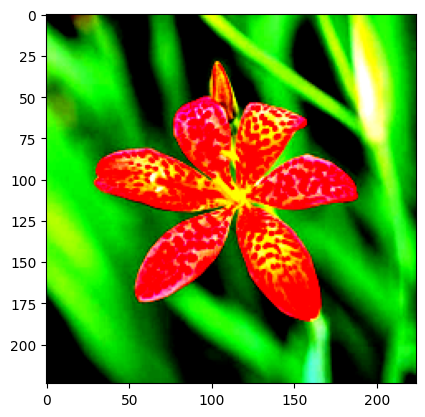

In [38]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
with open("flower.jpg", "wb") as f:
    img = requests.get("https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcRn9MrCAcUdLdT5Vq-OYbbajfwAc76O_O5tSm6Zl_DyW_ZwwbZHO1nzngwo-qs7Abrk15xncGbGSc_FG9ehU4rX-w")
    f.write(img.content)

img_path = "./flower.jpg"
# img_path = "./steak.jpg"
img = Image.open(img_path)
img = new_eff_net_transfromer(img).unsqueeze(0)
plt.imshow(img[0].permute(1,2,0))


In [39]:
with torch.inference_mode():
    new_eff_model.eval()
    y_pred = new_eff_model(img.to(device))

In [40]:
class_name_list[int(_classes[torch.argmax(y_pred)])-1], _classes[torch.argmax(y_pred)]

('blackberry lily', '102')